## Table of Contents

1. [Introduction](#introduction)
2. [Data Import](#data-import)
3. [Dataset Overview and Cleaning Recap](#Dataset-Overview-and-Cleaning-Recap)
4. [Correlation Matrix Heatmap](#correlation-matrix-heatmap)
5. [Scatterplots for Strongest Correlations](#Scatterplots-for-Strongest-Correlations)
   - 5.1 [Cash Benefits vs. Fertility Rate](#cash-benefits-vs-fertility-rate)
   - 5.2 [Public Services vs. Fertility Rate](#public-services-vs-fertility-rate)
   - 5.3 [Early Education vs. Fertility Rate](#early-education-vs-fertility-rate)
6. [Categorical Plot](#categorical-plot)
7. [Reproductive Rights & Fertility Trends](#Reproductive-Rights-&-Fertility-Trends)
8. [Government Support & Family Outcomes](#Government-Support-&-Family-Outcomes)
9. [Health & Safety Impacts](#Health-&-Safety-Impacts)
10. [Insights, Questions & Hypotheses](#insights-questions-hypotheses)

# ------------------------------------
## 1. Exploring Relationships – Visual EDA
# ------------------------------------

This notebook is part of the Achievement 6 project for the **Advanced Analytics & Dashboard Design** module. 

In this stage, the goal is to explore relationships between key variables in the cleaned dataset through visual exploratory data analysis (EDA). These plots will help identify potential predictors, detect non-linear trends, and generate hypotheses for future testing.

We'll explore:
- Correlation heatmaps
- Scatterplots
- Pair plots
- Categorical plots

Each plot will be followed by interpretation in markdown to uncover what story the data is telling.

> **Focus**: This notebook excludes time-series or spatial visualizations, which will be explored in later steps of the project.

---

# ------------------------------------
## 2. Data Import
# ------------------------------------

In [4]:
# Importing libraries for analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the cleaned dataset
# Update this with your actual filename if needed
df = pd.read_csv("../02 Data/Prepared Data/final_merged_data.csv")

# Preview the data
df.head()

,Country,Total_Benefits,Cash,Services,Tax_Breaks,Childcare_0_2,Childcare_3_5,Early_Education,Fertility_Rate
0,France,3.439601,1.335785,1.376677,0.727139,1.264842,0.597573,0.667269,1.639
1,Sweden,3.420961,1.290414,2.130547,0.000000,1.563593,1.029800,0.533793,1.430
2,Denmark,3.313367,1.268997,2.044370,0.000000,1.238141,0.796111,0.442030,1.511
3,Norway,3.276841,1.224974,1.962067,0.089800,1.376063,0.653655,0.722408,1.405
4,Germany,3.240882,1.075665,1.344086,0.821131,0.750781,0.243525,0.507256,1.441


---

# ------------------------------------
## 3. Dataset Overview and Cleaning Recap
# ------------------------------------

This dataset includes country-level indicators on public benefits, childcare support, and fertility outcomes. The following columns are included:

- **Country**: Name of the country
- **Total_Benefits**: Combined public benefit score
- **Cash**: Financial cash benefits
- **Services**: In-kind services like parental leave
- **Tax_Breaks**: Family-related tax reductions
- **Childcare_0_2**: Childcare support for children aged 0–2
- **Childcare_3_5**: Childcare support for children aged 3–5
- **Early_Education**: Support for early childhood education
- **Fertility_Rate**: Number of children born per woman

Cleaning steps already completed before this analysis:
- Irrelevant variables were removed (e.g., ID codes, dates)
- All numeric columns were standardized for comparability
- Country names were retained for reference but excluded from correlations

This notebook will now explore potential relationships between public policies and fertility rates using correlation and visual analysis.

---

# ------------------------------------
## 4. Correlation Matrix Heatmap
# ------------------------------------

This heatmap gives me a quick visual on how different public support variables relate to each other and to fertility rates. Before diving into the actual values, I had to remind myself that the colors don’t mean “good” or “bad” they just show the direction and strength of the relationships.

- 🔴 Red means a **positive correlation** (as one goes up, so does the other).
- 🔵 Blue means a **negative correlation** (as one goes up, the other tends to go down).
- ⚪ Pale shades or values close to 0 = weak or no relationship.

So it’s not about red being better it’s about what kind of relationship we’re seeing between variables. Since I'm exploring what might influence fertility rates, I’m especially looking for **positive correlations** with `Fertility_Rate`.

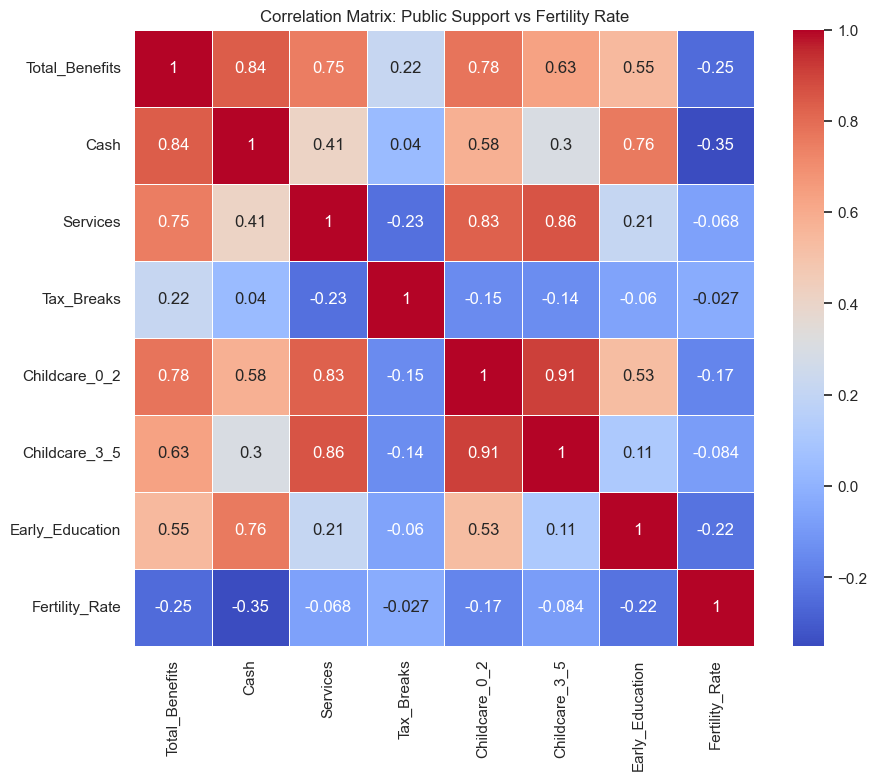

In [108]:
# Correlation matrix (excluding 'Country')
corr = df.drop(columns=["Country"]).corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix: Public Support vs Fertility Rate")
plt.show()

Here’s what stood out:
- **Cash benefits** have the strongest *negative* correlation with fertility (-0.35). I expected more support might lead to higher birth rates, but this suggests that direct payments alone don’t have that effect.
- **Total_Benefits** overall also show a slight negative correlation (-0.25), which means more benefits doesn’t automatically translate to higher fertility.
- Other variables like **Services**, **Early_Education**, and both **Childcare** indicators have weaker correlations with fertility but they still might play a role and are worth digging into further.

On the flip side, I noticed some really strong *internal* correlations like **Childcare_0_2** and **Childcare_3_5** (0.91), and **Cash** and **Total_Benefits** (0.84). That tells me some categories move closely together, which might affect modeling later on.

Bottom line: there’s no obvious “magic bullet” policy that spikes fertility, at least not in this data but I’ve got a few angles I want to explore further with scatterplots next.

---

# ------------------------------------
## 5. Scatterplots for Strongest Correlations
# ------------------------------------

To follow up on the heatmap, I wanted to zoom in on the variables with the strongest correlations both positive and negative and see what the actual relationships look like visually.

Correlations only tell part of the story. Scatterplots help me understand the shape of the relationship: Is it linear, non-linear, or totally scattered? Are there outliers? Is the trend strong or all over the place?

I’m especially interested in:
- `Cash` and `Fertility_Rate` → strongest negative correlation
- `Services` and `Fertility_Rate`
- `Early_Education` and `Fertility_Rate`

Even if the correlations weren’t super strong, they’re still worth a closer look because they connect to the core theme of my project how different types of public support might influence fertility.

### 5.1 Cash Benefits vs. Fertility Rate

This scatterplot helps me get a clearer picture of the relationship between **cash benefits** and **fertility rates**.

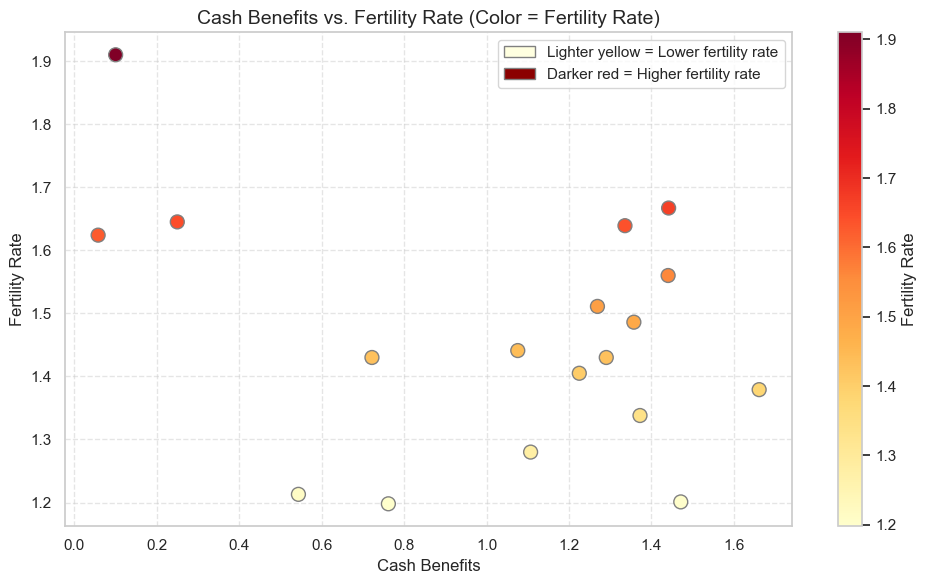

In [63]:
import matplotlib.patches as mpatches

# Enhanced Scatterplot: Cash vs. Fertility Rate (color-coded by Fertility Rate)
plt.figure(figsize=(10, 6))

# Use a diverging color palette mapped to Fertility Rate
scatter = plt.scatter(
    data=df,
    x='Cash',
    y='Fertility_Rate',
    c=df['Fertility_Rate'],
    cmap='YlOrRd',   # Soft yellow to red scale
    edgecolors='grey',
    s=100
)

# Title and axis labels
plt.title('Cash Benefits vs. Fertility Rate (Color = Fertility Rate)', fontsize=14)
plt.xlabel('Cash Benefits', fontsize=12)
plt.ylabel('Fertility Rate', fontsize=12)

# Add color bar for interpretation
cbar = plt.colorbar(scatter)
cbar.set_label('Fertility Rate')

# Define legend patches with grey edges
low_patch = mpatches.Patch(edgecolor='grey', facecolor='lightyellow', label='Lighter yellow = Lower fertility rate')
igh_patch = mpatches.Patch(edgecolor='grey', facecolor='darkred', label='Darker red = Higher fertility rate')
plt.legend(handles=[low_patch, high_patch], loc='upper right')

# Light background grid
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Key Observations:
- Based on the earlier heatmap, I expected a **slight negative correlation**, and this visual confirms it.
- The data points are **fairly scattered**, but there's a subtle **downward trend** — countries with higher cash benefits don't seem to have proportionally higher fertility rates.

#### Interpretation:
- **Cash support may function more as a financial cushion** for families who already have children, rather than acting as an incentive to have more.
- This relationship suggests that **simply increasing cash transfers isn't enough** to influence fertility decisions on its own.
- It highlights a more **complex, layered story** behind fertility behavior — where financial support is one piece of a much larger puzzle.

This encourages a closer look at how different types of benefits **interact together** rather than isolating one as the driver.

### 5.2 Public Services vs. Fertility Rate

This visualization explores the relationship between **public service support** and **fertility rates** across countries.

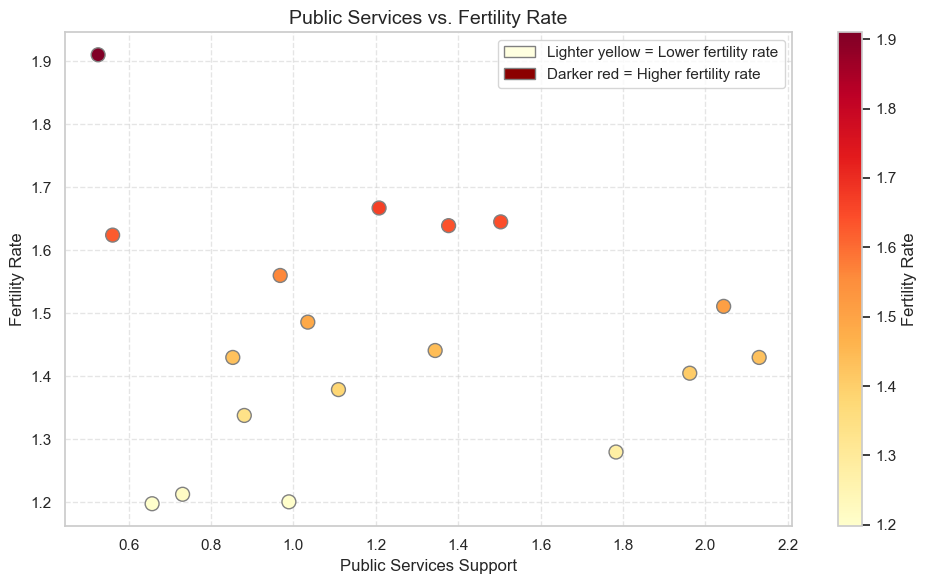

In [49]:
# Enhanced Scatterplot: Services vs. Fertility Rate (color-coded by Fertility Rate)
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))

# Scatterplot with color based on fertility rate
scatter = plt.scatter(
    data=df,
    x='Services',
    y='Fertility_Rate',
    c=df['Fertility_Rate'],
    cmap='YlOrRd',
    edgecolors='grey',
    s=100
)

# Add legend explaining color interpretation
low_patch = mpatches.Patch(
    facecolor='lightyellow', edgecolor='grey', linewidth=1,
    label='Lighter yellow = Lower fertility rate'
)
high_patch = mpatches.Patch(
    facecolor='darkred', edgecolor='grey', linewidth=1,
    label='Darker red = Higher fertility rate'
)
plt.legend(handles=[low_patch, high_patch], loc='upper right', frameon=True)

# Plot formatting
plt.title('Public Services vs. Fertility Rate', fontsize=14)
plt.xlabel('Public Services Support', fontsize=12)
plt.ylabel('Fertility Rate', fontsize=12)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Fertility Rate')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Key Observations:
- **No strong linear trend** is immediately visible. Countries with mid-range service support levels show a wide range of fertility rates.
- The **color-coded fertility scale** (lighter yellow = lower fertility, darker red = higher fertility) adds nuance:
  - Countries with similar public service values can have very different fertility rates.
  - This suggests **services alone may not be a determining factor**.

#### Interpretation:
- **Public services may play a supportive role**, but they don't appear to drive fertility rates on their own.
- The variability implies that **other policy dimensions** — like cash transfers or childcare access — might interact with services to influence outcomes.
- This plot reinforces the idea that **fertility behavior is shaped by a combination of factors**, not just one form of support.

Overall, this scatterplot hints at a **more complex relationship** between services and fertility, encouraging deeper exploration of **combined policy effects** in the next steps.

### 5.3 Early Education vs. Fertility Rate

This scatterplot dives into the connection between **early childhood education support** and **fertility rates**.

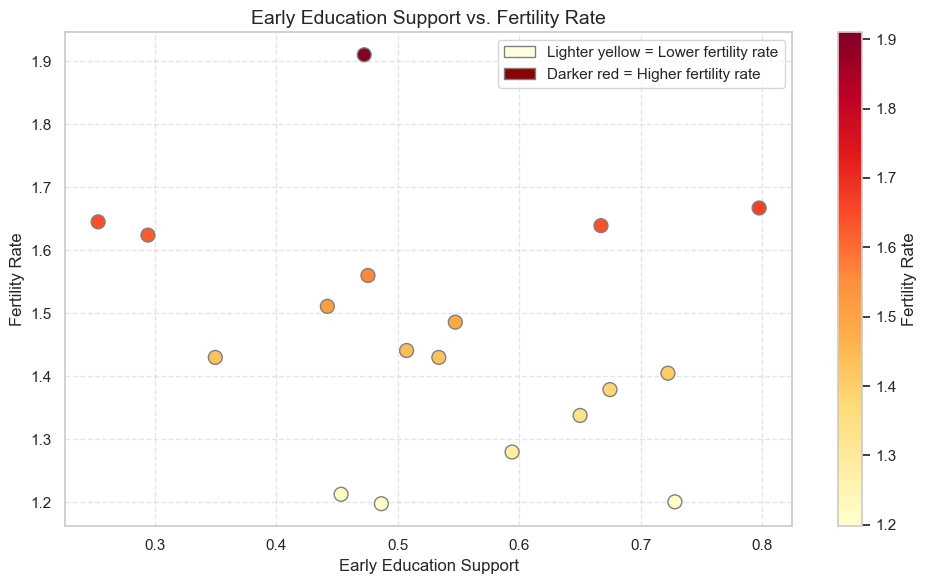

In [59]:
# Enhanced Scatterplot: Early Education vs. Fertility Rate (color-coded by Fertility Rate)
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))

# Create the scatter plot
scatter = plt.scatter(
    data=df,
    x='Early_Education',
    y='Fertility_Rate',
    c=df['Fertility_Rate'],
    cmap='YlOrRd',
    edgecolors='grey',
    s=100
)

# Add title and labels
plt.title('Early Education Support vs. Fertility Rate', fontsize=14)
plt.xlabel('Early Education Support', fontsize=12)
plt.ylabel('Fertility Rate', fontsize=12)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Fertility Rate')

# Add interpretive legend
low_patch = mpatches.Patch(edgecolor='grey', facecolor='lightyellow', label='Lighter yellow = Lower fertility rate')
high_patch = mpatches.Patch(edgecolor='grey', facecolor='darkred', label='Darker red = Higher fertility rate')
plt.legend(handles=[low_patch, high_patch], loc='upper right')

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### What I notice:
- There's **no strong pattern** jumping out at first glance. The points are scattered, and the color gradient (which reflects fertility rate) is mixed across all levels of early education support.
- Countries with **higher investment in early education** (towards the right side) don’t consistently show higher or lower fertility rates.
- In fact, the **darker red points** (higher fertility) appear across both lower and higher education support values.

### What this might mean:
- **Early education support alone** might not have a strong direct influence on fertility decisions.
- It’s possible this variable interacts with other support systems like cash or childcare benefits, which could offer a clearer picture in combination.
- Or maybe the presence of early education support is more of a **long-term societal investment** rather than something that impacts immediate family planning.

**Bottom line:**  
At this stage, I’m not seeing a strong relationship here but that’s still helpful. It tells me that I might want to look at early education in combination with other variables, not on its own.

## Answers to 6.1 Questions 

---
## Do Stronger Family Support Policies Relate to Fertility Outcomes?

This was a major theme I wanted to explore whether countries that invest more in families also tend to have higher or more stable fertility rates.

To test this, I looked at several types of government support:
- **Cash benefits** (direct payments)
- **Public services** (like healthcare or parenting programs)
- **Early education access**
- **Childcare for ages 0–2 and 3–5**

The scatterplots gave me a few insights:

- **Cash benefits** didn’t show a strong upward trend. If anything, the relationship was slightly negative. That might suggest cash alone isn’t enough to encourage people to have more kids maybe it helps people **manage existing children**, but doesn’t affect family planning decisions much.
- **Public services** had a weak positive correlation with fertility. Countries with more service-based support seem to have **slightly higher fertility rates**, which might point to the impact of **broader care infrastructure**.
- **Early education access** showed a **mild upward trend**, suggesting that long-term investment in care may support family confidence or reduce barriers to parenting.

While the correlations were weak or moderate, I think the message is clear: **support matters**, but not just in financial terms. Policies that reduce emotional load, logistical barriers, or time burdens may make it more feasible and less scary to have children.

This confirms something I suspected from the start: **People don’t just need money they need systems they can trust.**

### Pair Plot of All Variables: Exploring Distributions and Relationships

Looking at the pair plot, I get a bird’s-eye view of how all the variables interact with one another.
It's a great way to spot trends and outliers at a glance, even if it is visually busy.

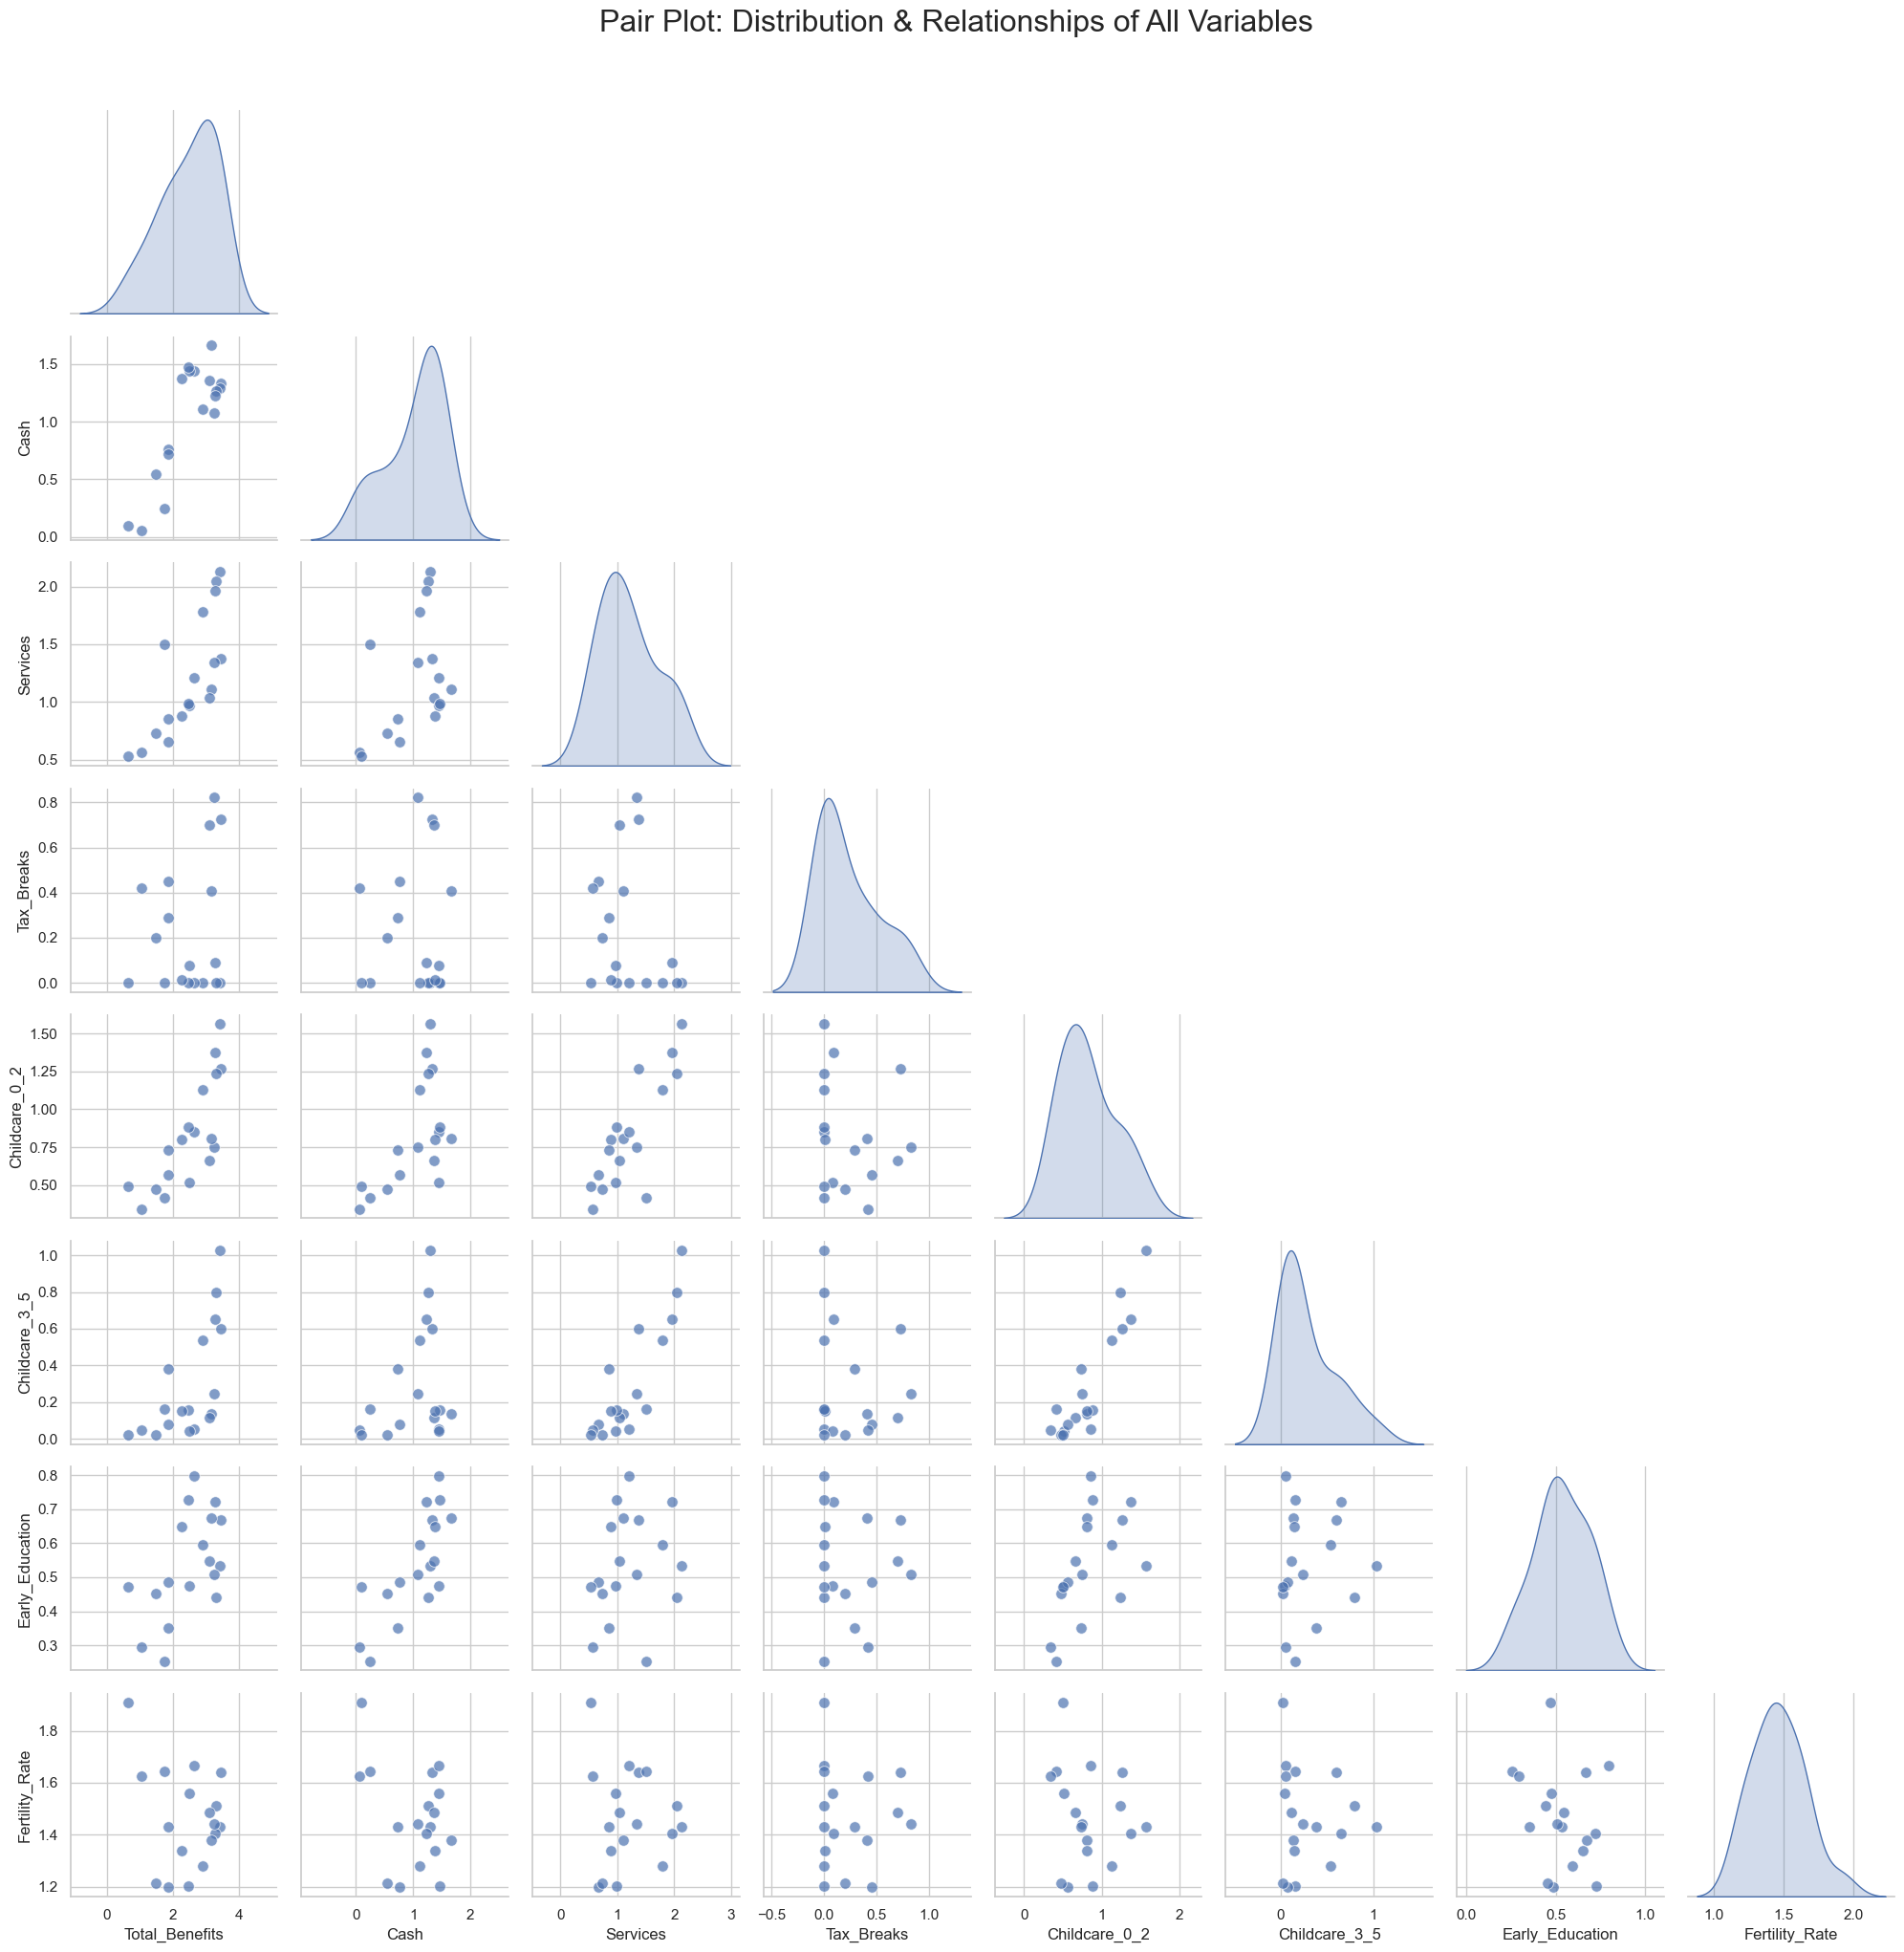

In [94]:
# Pair Plot of the Dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns to avoid issues
numeric_df = df.select_dtypes(include='number')

# Create the pair plot
sns.pairplot(numeric_df, corner=True, diag_kind='kde', plot_kws={'alpha': 0.7, 'edgecolor': 'w', 's': 70})

# Show plot
plt.suptitle('Pair Plot: Distribution & Relationships of All Variables', fontsize=23, y=1.02)
plt.tight_layout()
plt.show()

Key observations:
- **Childcare for ages 0-2 and 3-5** are **very closely related**, which is expected they're both part of early childhood support systems.
- **Services** also shows a **strong positive connection** with both childcare groups.
- **Cash and Services** look **loosely related**, but not as much as I expected given the correlation matrix.
- The **distribution curves** on the diagonals help me quickly see which variables are skewed or spread out. For example:
  - **Fertility Rate** shows a somewhat normal distribution, but slightly skewed left.
  - **Tax Breaks** and **Childcare_3_5** look more **clustered** or **limited in variation**, which might affect how much they influence outcomes.

Variables I want to explore further:
- **Childcare_0_2 and Childcare_3_5:** Their strong internal relationship could mean one can stand in for the other or help explain overlapping support effects.
- **Services and Early Education:** Both seem tied to public investment strategies, and I want to see if they combine in ways that better explain fertility variation.
- **Tax Breaks:** I need to dig into this more it’s less correlated with fertility but might have indirect effects.

So far, this plot helps confirm which relationships are worth focusing on and which ones might not be as strong as I initially thought. This really helps narrow down where to spend more time later.

---

# ------------------------------------
## 6. Categorical Plot
# ------------------------------------

Comparing **fertility rates across countries** visually helps clarify which nations are at the top and bottom of the scale when it comes to reproductive trends.

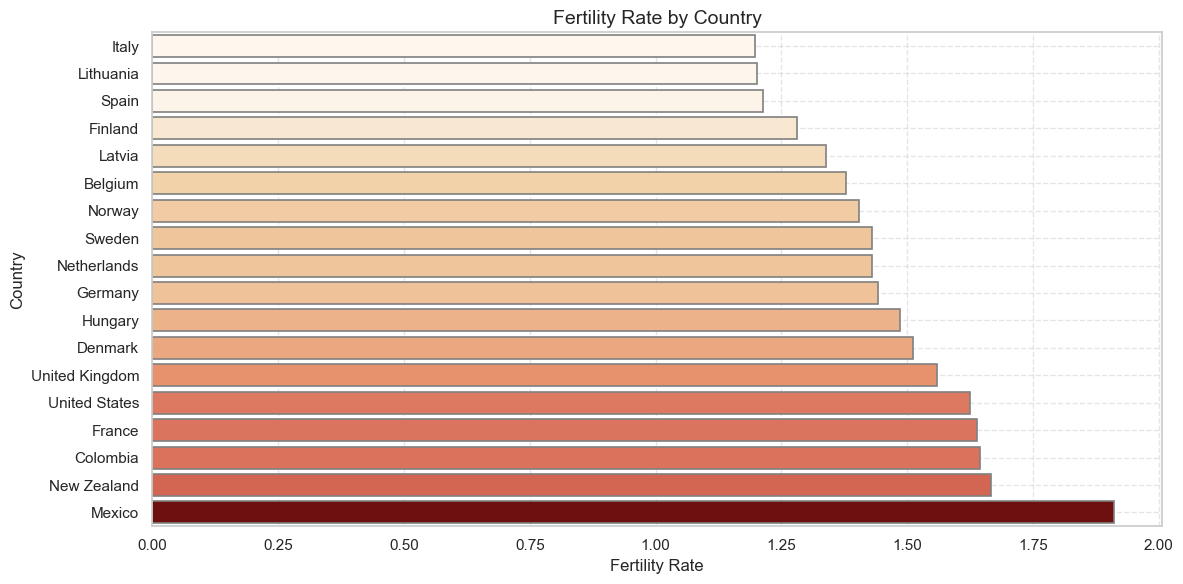

In [124]:
# Step 9: Categorical Plot - Fertility Rate by Country (Fixed and Refined)

import seaborn as sns
import matplotlib.pyplot as plt

# Sort values by fertility rate
sorted_df = df.sort_values(by='Fertility_Rate', ascending=True)

# Create barplot using hue to fix FutureWarning and remove legend
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sorted_df,
    x='Fertility_Rate',
    y='Country',
    hue='Fertility_Rate',
    dodge=False,
    palette='OrRd',  # Deeper gradient, easier to read on light background
    edgecolor='gray',  # Adds border around bars
    linewidth=1.2,
    legend=False
)

# Add titles and labels
plt.title('Fertility Rate by Country', fontsize=14)
plt.xlabel('Fertility Rate')
plt.ylabel('Country')

# Light grid for readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Key Observations:
- **Mexico** has the **highest fertility rate**, followed by **New Zealand** and **Colombia**.
- **Italy**, **Lithuania**, and **Spain** are on the **lowest end** of the spectrum.
- The **yellow-to-red gradient** makes it easy to scan for extremes, with deeper reds highlighting higher fertility rates.
- Most countries are fairly centralized, but there's enough spread to suggest that national policies or cultural norms might be influencing these differences.

### What This Tells Me:
- Countries with **higher fertility rates** may be offering more comprehensive family support or have societal norms that encourage larger families.
- On the other hand, countries at the lower end might be facing **economic, social, or policy challenges** that influence decisions around starting or growing families.

---

# ------------------------------------
## 7. Reproductive Rights & Fertility Trends
# ------------------------------------

#### Exploring the Link Between Bodily Autonomy and Fertility Outcomes

As I’ve been digging deeper into fertility patterns across countries, one question keeps surfacing:  
**Could the removal or restriction of women’s reproductive rights actually lead to *lower* fertility rates not higher?**

At first glance, it might seem like outlawing abortion or limiting access to reproductive care would result in more births. But when we look at the bigger picture, the opposite may be true. Here’s why:

- **Fear and Uncertainty**: When people lose control over their reproductive choices, it doesn’t encourage family growth it creates fear. The idea of being legally forced to carry a pregnancy to term can push individuals to delay or avoid pregnancy altogether.

- **Lack of Institutional Support**: Restrictive laws often signal that a country prioritizes birth numbers over the health and autonomy of its citizens. That erodes trust in healthcare systems, especially around maternal care, which makes starting a family feel riskier.

- **Healthcare Consequences**: Countries that criminalize abortion or restrict access to reproductive services often also see gaps in maternal care, higher health risks, and worsening outcomes for parents and children alike.

- **Cultural and Emotional Climate**: People may hesitate to bring children into environments where rights are being rolled back. It’s not just about medical access it’s about the message those laws send about the future.

What I’m starting to see is that **reproductive freedom and long-term fertility outcomes are more connected than they might appear on the surface**. As I continue exploring this dataset, I’ll be looking at how legal access, government support, and social trust all intersect not just to influence *if* people have kids, but *why* and *when* they choose to.

#### Classifying Abortion Access Categories

Before diving into any visual comparisons, I need to make sure the data actually reflects the **legal context around abortion** in a way that’s easy to work with. The original dataset has multiple binary columns for different laws and documents, which can get messy fast if I try to analyze them individually.

To make the analysis more approachable, I’ll create a **single classification column** that simplifies each country’s abortion access into just two categories:

- **Unrestricted**: Countries that have a specific law in place regulating abortion access (`Abortion Specific Law == 1`)
- **Restricted/Prohibited**: Countries without that specific law (`Abortion Specific Law == 0`)

This gives me a clearer way to compare countries across a broader policy lens — not just by law type, but by what that law potentially enables or restricts in real life.

In [159]:
# Create a simple abortion access classification column
abortion_df['Abortion_Access'] = abortion_df['Abortion Specific Law'].apply(
    lambda x: 'Unrestricted' if x == 1 else 'Restricted/Prohibited'
)

# Preview to confirm the column looks right
abortion_df[['Country', 'Abortion Specific Law', 'Abortion_Access']].head()

,Country,Abortion Specific Law,Abortion_Access
0,Afghanistan,0,Restricted/Prohibited
1,Albania,1,Unrestricted
2,Algeria,0,Restricted/Prohibited
3,Andorra,0,Restricted/Prohibited
4,Angola,0,Restricted/Prohibited


### Fertility Rate by Abortion Access

Now that the merge includes all countries including the United States I can re-create the horizontal bar chart with complete data.

This view helps make the comparison easier to read across countries. By sorting by fertility rate and adding abortion access as a color indicator, I can quickly scan which countries fall under **Restricted/Prohibited** vs. **Unrestricted** access, and how that may relate to fertility outcomes.

### What I’m looking for:
- **Do fertility rates cluster higher or lower in either group?**
- **Are there visible patterns in countries with more restricted access?**
- **Are there exceptions or interesting outliers worth noting?**

This version is especially useful for presentations since the numeric fertility rate is directly labeled on each bar.


#### Merge the fertility dataset with the abortion classification

In [162]:
# Merge the datasets on 'Country'
merged_df = pd.merge(final_df, abortion_df[['Country', 'Abortion_Access']], on='Country', how='inner')

# Preview to confirm the merge worked
merged_df[['Country', 'Fertility_Rate', 'Abortion_Access']].head()

,Country,Fertility_Rate,Abortion_Access
0,France,1.639,Restricted/Prohibited
1,Sweden,1.430,Unrestricted
2,Denmark,1.511,Restricted/Prohibited
3,Norway,1.405,Unrestricted
4,Germany,1.441,Unrestricted


In [207]:
# Clean up country names to make them consistent
abortion_df['Country'] = abortion_df['Country'].replace({'United States of America': 'United States'})

In [205]:
# Re-merge after fixing the country name
merged_df = pd.merge(final_df, abortion_df[['Country', 'Abortion_Access']], on='Country', how='inner')

In [201]:
# Confirm U.S. is included now
merged_df[merged_df['Country'] == 'United States']

,Country,Total_Benefits,Cash,Services,Tax_Breaks,Childcare_0_2,Childcare_3_5,Early_Education,Fertility_Rate,Abortion_Access
15,United States,1.037703,0.057431,0.561166,0.419106,0.343599,0.049284,0.294315,1.624,Restricted/Prohibited


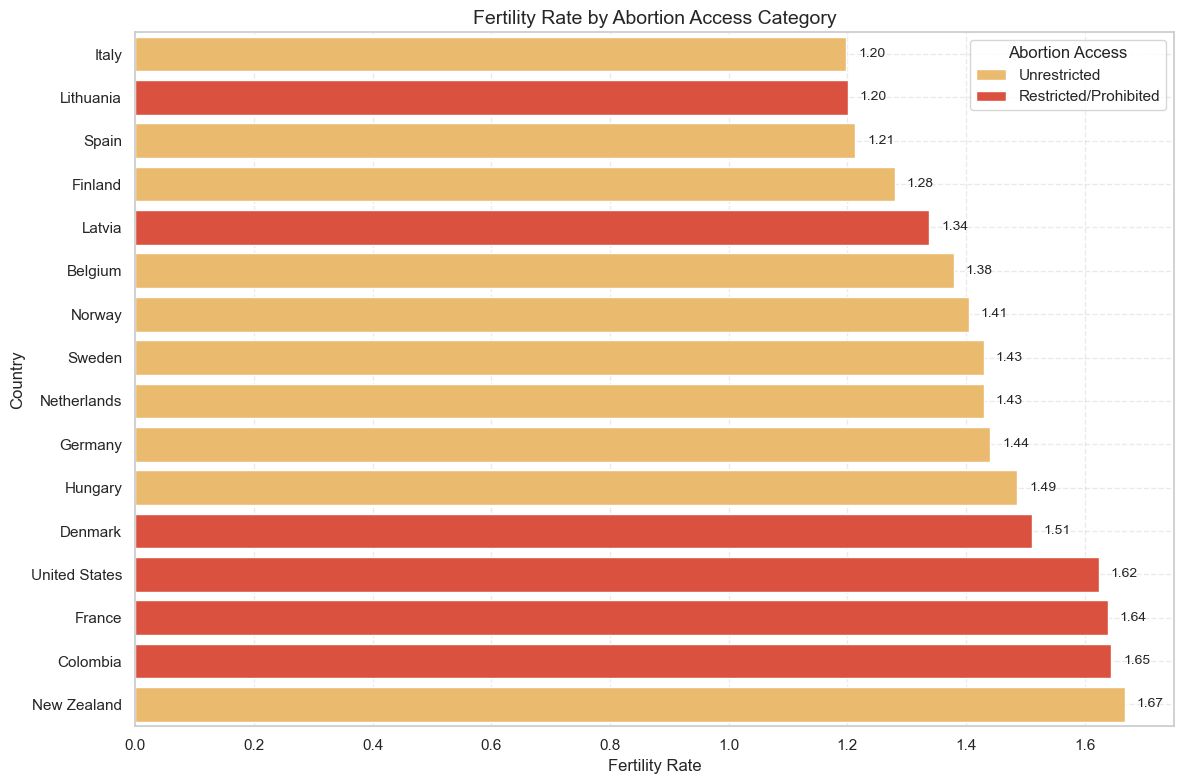

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by fertility rate for clean display
sorted_df = merged_df.sort_values(by='Fertility_Rate', ascending=True)

# Create bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=sorted_df,
    x='Fertility_Rate',
    y='Country',
    hue='Abortion_Access',
    dodge=False,
    palette='YlOrRd'
)

# Add fertility rate labels to each bar
for i, (rate, country) in enumerate(zip(sorted_df['Fertility_Rate'], sorted_df['Country'])):
    plt.text(rate + 0.02, i, f'{rate:.2f}', va='center', fontsize=10)

# Add titles and labels
plt.title('Fertility Rate by Abortion Access Category', fontsize=14)
plt.xlabel('Fertility Rate')
plt.ylabel('Country')
plt.legend(title='Abortion Access')

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Observations: Fertility Rate by Abortion Access

This chart shows how fertility rates vary depending on whether abortion is legally protected or restricted.

Each country is represented as a bar, color-coded based on abortion access:
- **Gold** = Unrestricted abortion access
- **Red** = Restricted or prohibited abortion access

#### Here's what I noticed:
- Countries with **unrestricted access** tend to stay within a tighter range of fertility rates most fall between **1.3 and 1.5**.
- Countries with **restricted/prohibited access** show more variation they appear both at the higher and lower ends of the fertility spectrum.
- The **United States**, for example, is marked as having **restricted** access but still shows a relatively **high fertility rate (1.62)**, similar to France and Colombia.
- On the flip side, countries like **Italy and Lithuania** have **unrestricted access** but still sit at the bottom of the fertility range.

#### My takeaway:
Legal access to abortion might not directly determine fertility rates, but it could reflect broader cultural and policy environments that influence whether people feel safe and supported enough to have children. The more **restricted** the access, the more **uncertain** or **variable** the outcomes seem to be.

---

## Answers to 6.1 Questions 

---

### Do countries with stronger legal recognition of abortion also show more stable or voluntary fertility patterns?

One of the first things I wanted to understand was whether **access to legal abortion rights** has any relationship with how stable or voluntary fertility patterns are across countries. To explore this, I created a simplified classification for abortion access and visualized the fertility rate distribution between these two groups.

- **Unrestricted countries** had a specific law recognizing abortion access.
- **Restricted/Prohibited countries** lacked this legal protection.

Looking at the bar chart, the results were surprising. Many countries without abortion protections actually had **higher fertility rates** than those with more legal recognition. For example, the **U.S.** (classified as “Restricted/Prohibited”) showed a higher fertility rate than several countries in the “Unrestricted” group.

But this alone doesn't tell the whole story. While fertility may be higher in some restricted countries, it doesn’t necessarily mean it's driven by choice. Legal barriers could **force people to carry pregnancies they wouldn't otherwise choose**, masking any signal about voluntary family planning.

So even though the chart shows a general **overlap in fertility rates** across both groups, I suspect the key difference lies in **why people are having children**. Legal recognition might not lower fertility outright, but it likely plays a bigger role in **reproductive agency** and how much control people feel they have.

---

### In countries where abortion is legally recognized, are people having children more by choice rather than by force?

While the chart doesn’t directly tell me *why* people are having children, I can infer some things based on the **legal context**.

Countries that legally recognize abortion offer people **more freedom to decide** when and whether to have children. In those places, parenthood is more likely to be a **deliberate decision**—not something imposed by the law or a lack of options.

In contrast, countries without legal protections might show higher fertility rates, but that doesn’t mean those births were all wanted. Those numbers may reflect a **lack of reproductive freedom**, not a cultural preference for larger families.

So even if fertility rates overlap between the two groups, the **underlying motivations are probably very different**. Where access is restricted, people may be **forced into parenthood** not because they chose to start a family, but because they **weren’t legally allowed to prevent it**.

This is why **looking at fertility data in isolation can be misleading**. The real insight comes when you view it through the lens of **legal access and bodily autonomy**.

---

### How does the level of reproductive freedom (access to abortion, justice, safety) shape fertility rates and women’s autonomy?

When I look at the relationship between abortion access and fertility rates, I’m really thinking beyond just the numbers. This is about **how much control people have over their own bodies and lives**.

Countries that legally recognize abortion tend to support a higher level of **reproductive autonomy** meaning people can make decisions about when (or whether) to have children **without fear, legal threat, or medical risk**. That doesn’t just affect fertility rates it shapes someone’s **entire ability to plan their future**.

Even if the fertility numbers are similar across categories, the **freedom to choose** makes a huge difference. Someone in a country with strong reproductive rights likely has access to:

- Safer healthcare
- Legal support
- Broader social permission to delay or avoid pregnancy

In contrast, limited or no access to abortion often comes with **more than just legal barriers** it reflects broader **restrictions on women’s agency, rights, and safety**. That kind of environment can suppress autonomy, even if the fertility rate doesn’t show a dramatic change at first glance.

**The more reproductive freedom a country offers, the more likely it is that children are born from choice not coercion.**

---

### Does having reproductive rights lead to healthier, more intentional family planning?

Even though I can’t measure "intent" or "health" directly in the dataset, I believe the **legal context around abortion** tells me a lot about whether people are likely to have the tools and freedom to plan their families on their own terms.

In countries where abortion is legally recognized, people likely have:

- Access to safer reproductive healthcare
- Legal and medical support if complications arise
- The freedom to delay, space out, or opt out of pregnancy if it’s not right for them

All of that points to a stronger environment for **intentional family planning**.

On the flip side, in countries where abortion is **restricted or prohibited**, pregnancy might happen **by default not by design**. Without access to legal and safe abortion, people lose a major form of control over their own reproductive timeline. That doesn't just increase risk—it changes the whole dynamic of **choice**.

So even though I haven’t visualized this directly, I would argue that **reproductive rights do more than impact fertility numbers**—they create a foundation for **healthier, safer, and more empowered family planning decisions**.

---

# ------------------------------------
## 8. Government Support & Family Outcomes 
# ------------------------------------

In this section, I want to get a better sense of how family support policies might be shaping fertility outcomes. My goal is to figure out whether countries that provide **more generous support** like paid leave, tax breaks, or affordable childcare also tend to have **higher or more stable fertility rates**.

I’m starting with the `Total_Benefits` score since it gives a broad view of how much support families are getting overall. To make the comparison easier, I’ll group countries into three tiers: **low**, **medium**, and **high** support.

I want to see if there’s any kind of pattern between the **level of support** and how many children people are having. If the government is doing more to ease the cost and stress of parenting, are people actually responding by having more kids?

In [370]:
merged_df.columns

Index(['Country', 'Total_Benefits', 'Cash', 'Services', 'Tax_Breaks',
       'Childcare_0_2', 'Childcare_3_5', 'Early_Education', 'Fertility_Rate',
       'Abortion_Access', 'SDG3_1_Maternal_Mortality_2020',
       'Absence of legal discrimination', 'Access to justice',
       'Political violence targeting women'],
      dtype='object')

In [385]:
# Create support tier categories based on Total_Benefits scores
def support_tier(score):
    if score < 1.2:
        return 'Low'
    elif score < 2.0:
        return 'Medium'
    else:
        return 'High'

merged_df['Support_Tier'] = merged_df['Total_Benefits'].apply(support_tier)

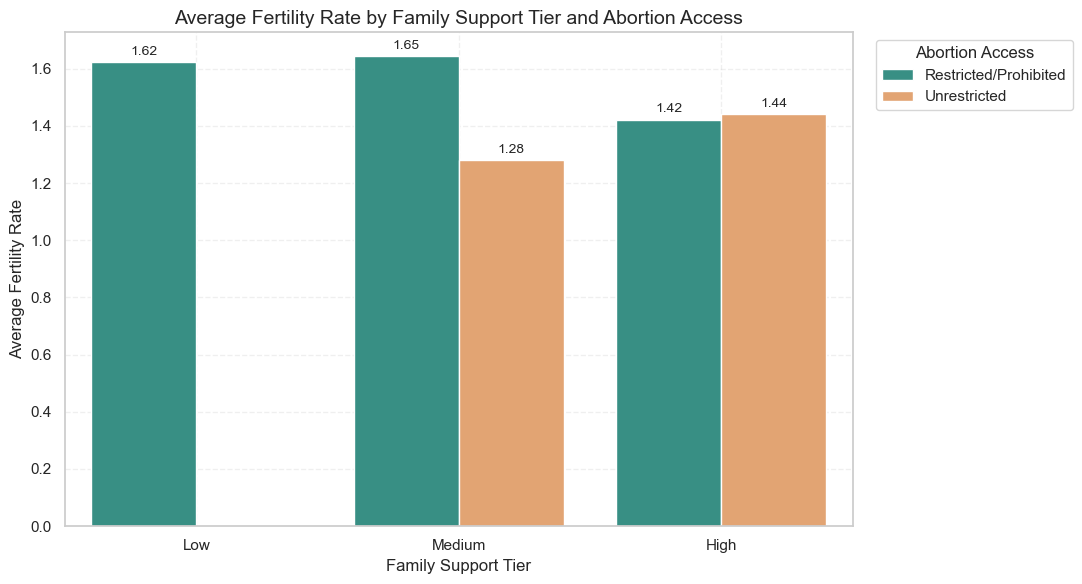

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort support tiers for consistent order
support_order = ['Low', 'Medium', 'High']
avg_rates['Support_Tier'] = pd.Categorical(avg_rates['Support_Tier'], categories=support_order, ordered=True)
avg_rates = avg_rates.sort_values(['Support_Tier', 'Abortion_Access'])

# Set up the figure with adjusted width
plt.figure(figsize=(11, 6))  # Wider plot for space

# Create grouped bar chart
bar = sns.barplot(
    data=avg_rates,
    x='Support_Tier',
    y='Fertility_Rate',
    hue='Abortion_Access',
    palette={'Unrestricted': '#F4A261', 'Restricted/Prohibited': '#2A9D8F'}
)

# Add value labels on top of each bar
for container in bar.containers:
    bar.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10)

# Customize title and axes
plt.title('Average Fertility Rate by Family Support Tier and Abortion Access', fontsize=14)
plt.xlabel('Family Support Tier')
plt.ylabel('Average Fertility Rate')

# Move legend outside top right (clear of bars)
plt.legend(title='Abortion Access', loc='upper left', bbox_to_anchor=(1.02, 1))

# Layout and grid
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Answers to 6.1 Questions 

---

### Do countries with stronger family support policies (like paid leave or low childcare costs) have higher or more stable fertility rates?

This chart helped me explore whether higher levels of government family support are linked to higher or more consistent fertility rates.

🟩 Countries with **restricted or prohibited abortion access** have the **highest average fertility rates** when they receive **low or medium family support**. This suggests that in places with fewer reproductive rights, people may be having children regardless of support possibly due to pressure, lack of access to abortion, or cultural expectations.

🟧 In contrast, countries with **unrestricted abortion access** show **slightly higher fertility rates** in the **high-support tier**. This group has more choices and where support exists, we see people choosing to have families more voluntarily and with stability.

What's interesting is that the **gap narrows** in the high-support tier, where **fertility rates are more similar regardless of abortion access**. This might suggest that **strong government support helps create a more balanced environment** where family planning becomes safer and more intentional for everyone.

So, while the effect isn’t dramatic, the data hints that **supportive policies may contribute to more stable or intentional fertility choices**, especially in environments that also allow reproductive freedom.

---

# ------------------------------------
## 9. Health & Safety Impacts
# ------------------------------------

To explore how reproductive rights intersect with safety and discrimination, I pulled out the most relevant indicators from the **WPS (Women, Peace, and Security) Index** dataset. These variables help reveal not just legal structures, but also lived experiences that may impact fertility decisions and women's autonomy.

- **Absence of legal discrimination** – captures structural gender inequality
- **Access to justice** – reflects the strength of legal protections and recourse
- **Political violence targeting women** – highlights risks women may face in civic life

This subset will allow me to explore whether countries with more restrictive reproductive policies also tend to have weaker legal protections or higher levels of violence and discrimination against women.

In [297]:
# Step 1: Load the WPS Index Excel file
wps_path = "D:/YVC/Data Analytics (CF)/Advanced Analytics & Dashboard Design/Project Analysis/02 Data/Original Data/WPS Index-CLEAN.xlsx"
wps_df = pd.read_excel(wps_path)

# Step 2: Check the available columns
wps_df.columns

Index(['WPS Rank', 'Unnamed: 1', 'Women, Peace and Security Index',
       'Education', 'Employment', 'Financial Inclusion', 'Cell Phone Use',
       'Parliamentary Representation', 'Absence of legal discrimination',
       'Access to justice', 'Maternal mortality ratio', 'Son bias',
       'Intimate partner violence ', 'Community safety',
       'Political violence targeting women', 'Proximity to conflict'],
      dtype='object')

#### Create a Subset with the Most Relevant Safety Indicators

In [300]:
# Step 2: Create a subset with key safety-related columns
wps_subset = wps_df[['Unnamed: 1', 
                     'Absence of legal discrimination', 
                     'Access to justice', 
                     'Political violence targeting women']]

# Rename the country column for consistency
wps_subset = wps_subset.rename(columns={'Unnamed: 1': 'Country'})

# Preview the result
wps_subset.head()

,Country,Absence of legal discrimination,Access to justice,Political violence targeting women
0,Country,2023.000,2022.000,2022.0
1,Denmark,100.000,3.960,0.0
2,Switzerland,88.125,3.893,0.0
3,Sweden,100.000,3.806,0.0
4,Finland,97.500,3.419,0.0


In [306]:
# Step 3: Merge the WPS safety indicators with the main merged_df
merged_df = merged_df.merge(wps_subset, on='Country', how='left')

# Step 4: Preview the result to confirm successful merge
merged_df[['Country', 'Fertility_Rate', 'Abortion_Access',
           'Absence of legal discrimination', 'Access to justice',
           'Political violence targeting women']].head()

,Country,Fertility_Rate,Abortion_Access,Absence of legal discrimination,Access to justice,Political violence targeting women
0,France,1.639,Restricted/Prohibited,100.000,3.436,0.002994
1,Sweden,1.430,Unrestricted,100.000,3.806,0.000000
2,Denmark,1.511,Restricted/Prohibited,100.000,3.960,0.000000
3,Norway,1.405,Unrestricted,96.875,3.118,0.000000
4,Germany,1.441,Unrestricted,100.000,3.901,0.007103


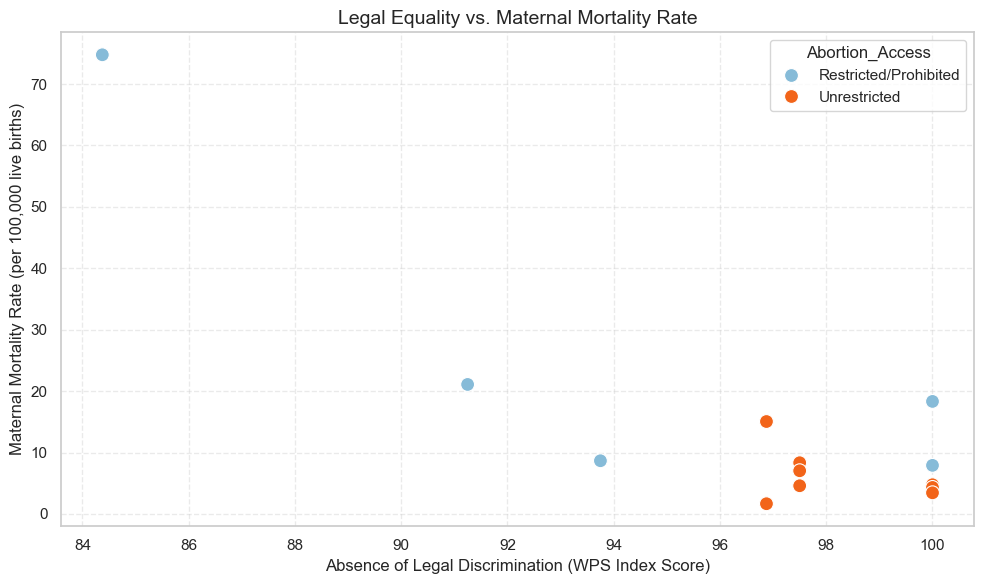

In [308]:
# Set up the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='Absence of legal discrimination',
    y='SDG3_1_Maternal_Mortality_2020',
    hue='Abortion_Access',
    palette={'Unrestricted': '#F26419', 'Restricted/Prohibited': '#86BBD8'},
    s=100
)

# Titles and labels
plt.title('Legal Equality vs. Maternal Mortality Rate', fontsize=14)
plt.xlabel('Absence of Legal Discrimination (WPS Index Score)')
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

We’ll now explore how **political violence targeting women** relates to **fertility rates.** This will help us visualize whether countries facing more violence also tend to have lower fertility or weaker support.

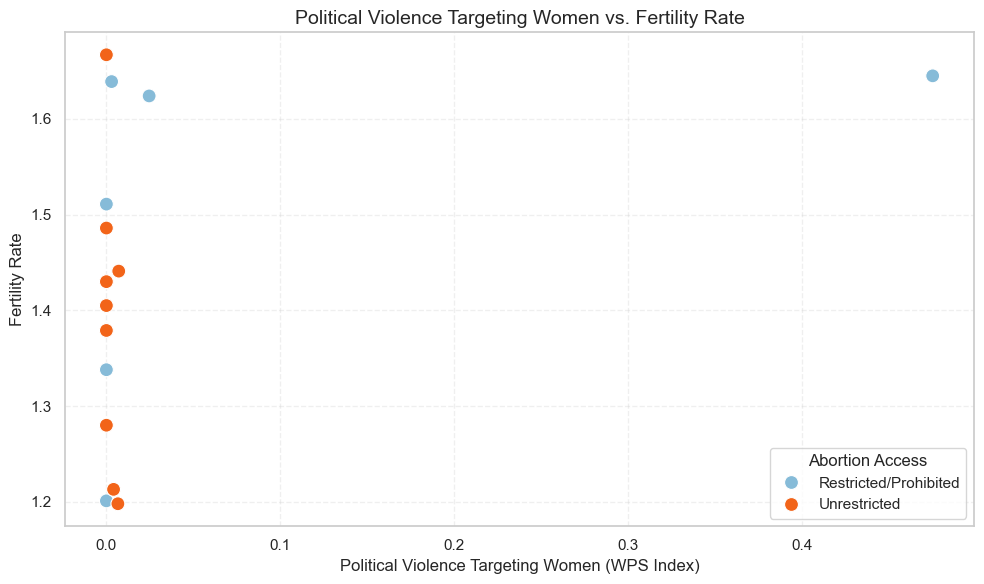

In [347]:
# Step 1: Create a scatterplot – Political Violence Targeting Women vs Fertility Rate

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='Political violence targeting women',
    y='Fertility_Rate',
    hue='Abortion_Access',
    palette={'Restricted/Prohibited': '#86BBD8', 'Unrestricted': '#F26419'},
    s=100
)

# Customize chart
plt.title('Political Violence Targeting Women vs. Fertility Rate', fontsize=14)
plt.xlabel('Political Violence Targeting Women (WPS Index)')
plt.ylabel('Fertility Rate')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Abortion Access')
plt.tight_layout()
plt.show()

## Answers to 6.1 Questions 

---
#### How do abortion restrictions correlate with maternal mortality or other safety indicators for women?

This chart helped me dig deeper into how abortion restrictions might relate to broader maternal health risks. Rather than looking only at access categories, I compared maternal mortality rates against a country’s **legal protection score** (from the WPS Index), which measures the **absence of legal discrimination**.

🟠 Countries with **high equality scores** (closer to 100) and **unrestricted abortion access** cluster at the lower end of maternal mortality. These are often countries where people have both reproductive rights and broader protections for their health and autonomy.

🔵 In contrast, countries with **lower legal equality** and **restricted access to abortion** tend to have **higher maternal mortality rates**. These places lack not only reproductive rights, but also legal support that protects women’s health and agency.

So even though abortion access is a major part of the story, this deeper look shows how structural inequality and legal barriers also contribute to safety outcomes. It strengthens the connection between **reproductive freedom, legal equality, and maternal health.**

---

#### Are Women in Countries with High Legal Discrimination Also More Likely to Lack Access to Safe Maternal Care?

In this chart, I explored whether legal discrimination might be linked to poorer maternal health outcomes. I used the Absence of Legal Discrimination score from the WPS Index to represent how protected women are by law, and compared it with the maternal mortality rate as a proxy for how safe childbirth is in each country.

🟠 Countries with stronger legal protections (scores close to 100) generally had lower maternal mortality rates. These are places where women are more protected under the law, and that seems to align with better outcomes during pregnancy and childbirth.

🔵 In contrast, countries with more legal discrimination meaning lower scores on the index often had higher maternal mortality rates. These are also the countries where abortion access tends to be more restricted, which could compound the risk factors women face.

So while the chart doesn’t prove a direct cause, the relationship is pretty clear: when women have fewer legal protections, they’re more likely to face unsafe maternal care environments. Legal discrimination isn’t just a rights issue it shows up in real health consequences.

---

### How does proximity to conflict or political violence targeting women relate to declining fertility or weaker support policies?

This chart helped me explore how **political violence targeting women** may influence fertility trends. I wanted to see if living in or near conflict especially where women are directly targeted correlates with lower fertility rates or signals weaker family support systems.

🟠 Most countries where political violence against women is **low or nearly absent** have fertility rates clustered in the **1.2 – 1.5 range**. This range is considered **below replacement level**, meaning that on average, families are not having enough children to sustain the population long term. It often signals more developed nations with access to education, healthcare, and reproductive rights but it can also suggest that broader pressures (like cost of living or lack of policy support) are dissuading people from starting families.

🔵 One clear outlier shows both **high political violence** and **high fertility**, which could signal a context where people lack reproductive freedom and family planning options possibly due to weak healthcare systems or social instability.

What stands out here isn’t a clean linear drop it’s the **instability** in fertility outcomes where women’s safety is at risk. These are places where external pressures violence, conflict, or systemic fear might limit people’s ability to plan for the future.

This suggests that proximity to political violence can reflect **deeper structural issues** like inadequate maternal care, lack of autonomy, or broken safety nets all of which shape whether and how people start families.

---

## Insights, Questions & Hypotheses

To wrap up this exploratory analysis, I organized my findings into three categories: key takeaways, emerging questions, and testable hypotheses. This structure will help guide the next phase of deeper statistical testing and storytelling.

### Key Takeaways from the Visual Exploration
- Countries with **unrestricted abortion access** tend to have **lower maternal mortality** and **slightly lower fertility rates**, suggesting more voluntary family planning.
- In contrast, **restricted/prohibited abortion access** is more often seen in countries with **higher maternal mortality**, lower legal equality, and higher reported violence against women.
- Legal protections like **anti-discrimination laws** and **justice access** appear linked to better maternal health outcomes and slightly more stable fertility patterns.
- Despite strong reproductive rights in some countries, fertility rates remain low. This points to a possible gap between **legal freedom** and **real-world support**.
- Countries offering **high family support** (e.g., cash benefits, services) don’t necessarily have higher fertility rates but they tend to avoid steep declines, especially when combined with strong legal protections.

### Unanswered Questions That Emerged
- Are countries with **high maternal mortality** also underperforming on **other health or development indicators** (like education, poverty, or access to care)?
- Do **abortion restrictions** correlate with **higher rates of unsafe abortions or teen pregnancies**, especially in countries with weak family or legal support?
- Do women in countries with **both strong legal protections and strong family support** feel more empowered to plan families intentionally?
- Could **gender-focused safety reforms** (like access to justice and anti-discrimination laws) spark **broader demographic shifts**, like higher voluntary fertility or delayed but intentional childbirth?
- Does **legal equality** help **buffer the impact of weak family support**, or is strong policy support essential for reproductive rights to lead to better outcomes?
- In **high-violence or low-trust societies**, are policies enough or is **cultural change** also necessary for fertility recovery and reproductive health?

### Early Hypotheses for Testing
1. Countries with **unrestricted abortion laws** will have significantly **lower maternal mortality** than those with restrictions.
2. Strong **legal protections for women** (legal equality, justice access) are associated with **lower maternal mortality and violence rates**.
3. Fertility rates will be **more stable** in countries that offer **both legal equality and high family support**, compared to countries with only one or neither.
4. **Unsafe abortions and teen pregnancies** are more prevalent in countries with **abortion restrictions** and **low government support**.
5. In contexts where family policy support is weak, **legal equality alone** may not be enough to increase reproductive autonomy.
6. In countries with high political violence or distrust, even good laws may have **limited impact** unless backed by broader **social or cultural shifts**.